# Regression Metrics  
(MAE, MSE, RMSE, R² Score, Adjusted R² Score)

`Regression metrics` are used to evaluate how well a regression model predicts continuous target values.
Each metric captures error or performance from a different perspective.

---

## MAE (Mean Absolute Error)

MAE measures the **average absolute difference** between predicted and actual values.

$$
MAE = \frac{1}{m} \sum_{i=1}^{m} |y^{(i)} - \hat{y}^{(i)}|
$$

### Key Properties
- Treats all errors equally  
- Less sensitive to outliers  
- Easy to interpret  

### Use When
- You want a simple and robust error metric  
- Outliers exist but should not dominate evaluation  

---

## MSE (Mean Squared Error)

MSE squares the errors before averaging, giving **more weight to large errors**.

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
$$

### Key Properties
- Penalizes large errors heavily  
- Smooth and differentiable (useful for optimization)  
- Units are squared  

### Use When
- Large errors are unacceptable  
- Gradient-based optimization is used  

---

## RMSE (Root Mean Squared Error)

RMSE is the square root of MSE, bringing the error back to the **original target units**.

$$
RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 }
$$

### Key Properties
- Penalizes large errors  
- Interpretable in original units  
- More sensitive to outliers than MAE  

### Use When
- You want interpretability with strong penalty on large errors  

---

## R² Score (Coefficient of Determination)

R² measures the **proportion of variance in the target variable explained by the model**.

$$
R^2 = 1 - \frac{\sum (y^{(i)} - \hat{y}^{(i)})^2}
{\sum (y^{(i)} - \bar{y})^2}
$$

### Key Properties
- Ranges from \( -\infty \) to 1  
- Higher values indicate better fit  
- Can be misleading with many features  

### Use When
- Comparing regression models  
- Evaluating explanatory power of features  

---

## Adjusted R² Score

Adjusted R² penalizes the addition of unnecessary features and adjusts R² based on the number of predictors.

$$
Adjusted\ R^2 =
1 - \left( \frac{(1 - R^2)(m - 1)}{m - p - 1} \right)
$$

Where:
- $m$ = number of samples  
- $p$ = number of features  

### Key Properties
- Increases only if a new feature improves the model  
- More reliable than R² for multiple regression  

### Use When
- Comparing models with different numbers of features  
- Preventing overfitting  

---

## Metric Comparison Summary

| Metric | Penalizes Outliers | Interpretable | Best Use Case |
|------|------------------|--------------|---------------|
| MAE | Low | High | Robust error measurement |
| MSE | High | Low | Optimization-focused models |
| RMSE | High | High | Practical error interpretation |
| R² | No | Medium | Model comparison |
| Adjusted R² | No | Medium | Multi-feature evaluation |

---

## Summary

No single regression metric is universally best.  
- Use **MAE** for robustness  
- Use **RMSE/MSE** when large errors matter  
- Use **R² / Adjusted R²** for explanatory power and model comparison  

Choosing the right metric depends on the problem, data distribution, and business objective.


In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('PLACE.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

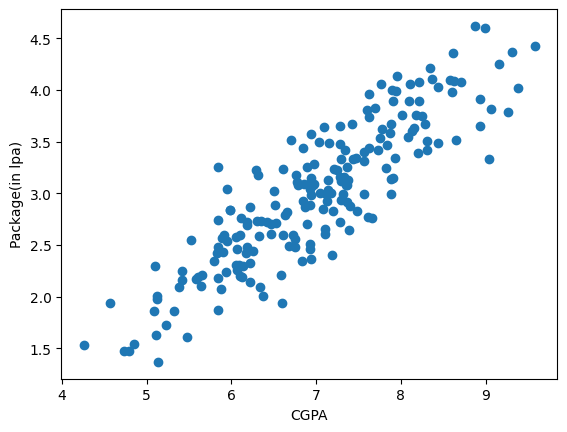

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package(in lpa)')

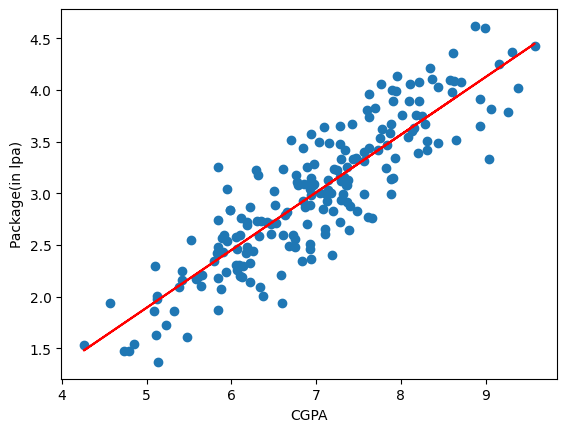

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
y_pred = lr.predict(X_test)

In [13]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [14]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [15]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [16]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [35]:
print("r2",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 0.8296283098894128


In [18]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [19]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

### Adding Random Features

In [20]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.681132,3.26
1,5.12,0.050317,1.98
2,7.82,0.425311,3.25
3,7.42,0.952624,3.67
4,6.94,0.286338,3.57


Text(0, 0.5, 'Package(in lpa)')

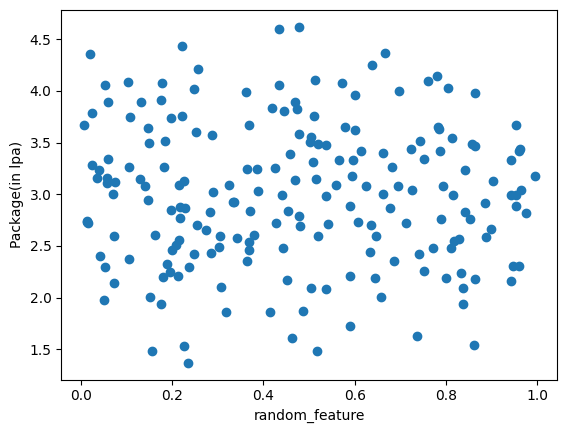

In [21]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [22]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression()
y_pred = lr.predict(X_test)

In [25]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7770908924451846


In [26]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7650417514962756

In [27]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
4,6.94,3.77,3.57
33,6.35,2.23,2.73
11,6.61,2.10,2.60
77,8.99,4.90,4.60
28,5.94,3.24,2.24


Text(0, 0.5, 'Package(in lpa)')

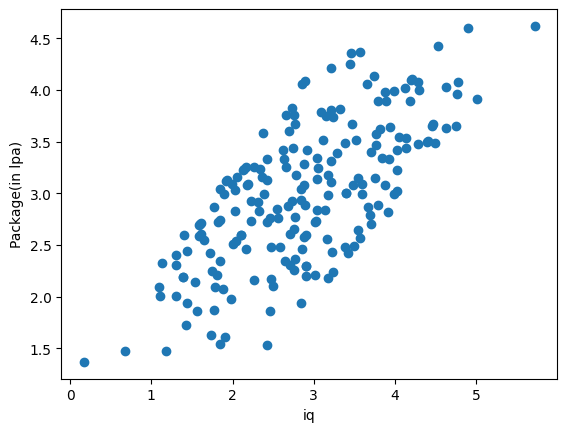

In [28]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [29]:
np.random.randint(-100,100)

-92

In [30]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [33]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8296283098894128


In [34]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8204190293428946